<a href="https://colab.research.google.com/github/Dharaniya805/ai-training/blob/main/TASK_3(MULTINOMIAL_AND_BERNOULLI_NAIVE_BAYES_ALGORITHM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [ ]:
reviews = {
    "text": [
        "The movie was wonderful and inspiring",
        "I really enjoyed this film a lot",
        "Such a beautiful and touching story",
        "Amazing direction and great acting",
        "I loved every minute of this movie",
        "What a fantastic experience overall",

        "The movie was boring and too long",
        "I really disliked this film so much",
        "Such a disappointing and dull story",
        "Terrible acting and bad direction",
        "I hated every minute of this movie",
        "What an awful experience overall"
    ],
    "sentiment": [
        "positive", "positive", "positive", "positive", "positive", "positive",
        "negative", "negative", "negative", "negative", "negative", "negative"
    ]
}

In [ ]:
df = pd.DataFrame(reviews)

In [ ]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df["text"])
y = df["sentiment"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=10, stratify=y
)

In [ ]:
# 4. TRAIN MULTINOMIAL NAIVE BAYES
mnb_clf = MultinomialNB()
mnb_clf.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# 5. PREDICTION + METRICS
y_pred = mnb_clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)

In [ ]:
print("Multinomial NB Accuracy:", round(acc, 2))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Multinomial NB Accuracy: 0.25

Confusion Matrix:
[[0 2]
 [1 1]]

Classification Report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         2
    positive       0.33      0.50      0.40         2

    accuracy                           0.25         4
   macro avg       0.17      0.25      0.20         4
weighted avg       0.17      0.25      0.20         4



In [ ]:
# ---------------------------------------------------
# 6. VISUALIZE MOST FREQUENT WORDS FOR EACH CLASS
# ---------------------------------------------------
feature_names = vectorizer.get_feature_names_out()

# Separate docs by label
pos_texts = df[df["sentiment"] == "positive"]["text"]
neg_texts = df[df["sentiment"] == "negative"]["text"]

pos_counts = vectorizer.transform(pos_texts).sum(axis=0).A1
neg_counts = vectorizer.transform(neg_texts).sum(axis=0).A1

# Choose top N tokens
N = 8

In [ ]:
top_pos_idx = np.argsort(pos_counts)[-N:]
top_neg_idx = np.argsort(neg_counts)[-N:]

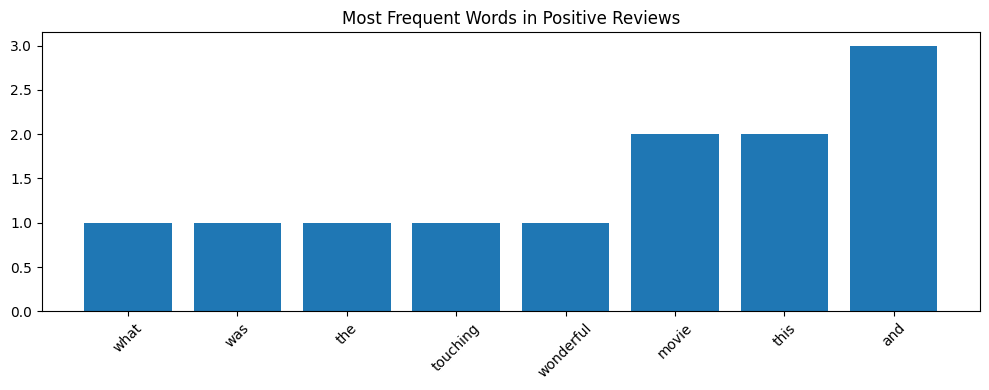

In [ ]:
# Plot positive words
plt.figure(figsize=(10, 4))
plt.bar([feature_names[i] for i in top_pos_idx], pos_counts[top_pos_idx])
plt.title("Most Frequent Words in Positive Reviews")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

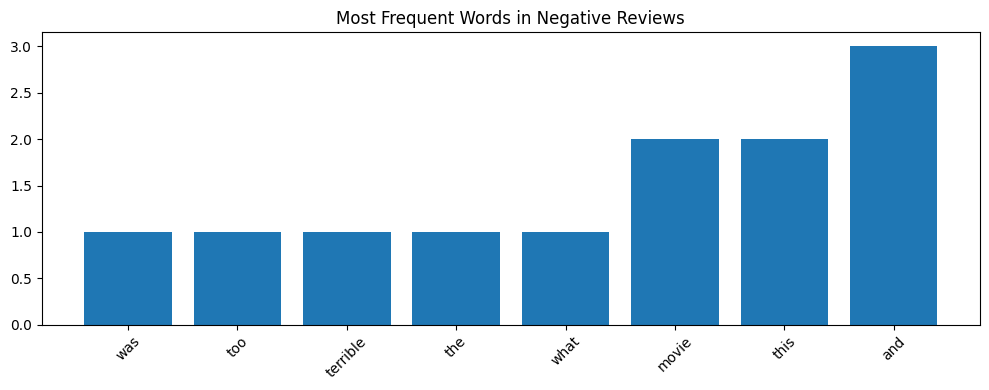

In [ ]:
# Plot negative words
plt.figure(figsize=(10, 4))
plt.bar([feature_names[i] for i in top_neg_idx], neg_counts[top_neg_idx])
plt.title("Most Frequent Words in Negative Reviews")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:

# -------------------------------------------
# BERNOULLI NAIVE BAYES - SENTIMENT DEMO
# -------------------------------------------

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
# 1. SYNTHETIC SHORT COMMENTS (POSITIVE / NEGATIVE)
comments = {
    "text": [
        "Service was excellent and friendly",
        "I am very satisfied with this",
        "Really good quality and fast delivery",
        "Super happy with the purchase",
        "I would definitely recommend this",
        "Everything about this was great",

        "Service was rude and slow",
        "I am very unhappy with this",
        "Really poor quality and late delivery",
        "Not happy with the purchase at all",
        "I would never recommend this",
        "Everything about this was bad"
    ],
    "label": [
        "positive","positive","positive","positive","positive","positive",
        "negative","negative","negative","negative","negative","negative"
    ]
}

In [ ]:
df2 = pd.DataFrame(comments)

In [ ]:
# 2. BINARY BAG-OF-WORDS FEATURES (0/1)
bin_vectorizer = CountVectorizer(binary=True)
X_bin = bin_vectorizer.fit_transform(df2["text"])
y_bin = df2["label"]

In [ ]:
# 3. TRAIN / TEST SPLIT
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(
    X_bin, y_bin, test_size=0.25, random_state=5, stratify=y_bin
)

In [ ]:
# 4. TRAIN BERNOULLI NAIVE BAYES
bnb_clf = BernoulliNB()
bnb_clf.fit(X_train_b, y_train_b)

BernoulliNB()

In [ ]:
# 5. EVALUATE MODEL
y_pred_b = bnb_clf.predict(X_test_b)
acc_b = accuracy_score(y_test_b, y_pred_b)

In [ ]:
print("Bernoulli NB Accuracy:", round(acc_b, 2))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_b, y_pred_b))

Bernoulli NB Accuracy: 0.0

Confusion Matrix:
[[0 1]
 [2 0]]


In [ ]:
# 6. WORD-LEVEL CLASS PROBABILITIES
feature_names_b = bin_vectorizer.get_feature_names_out()
log_prob_b = bnb_clf.feature_log_prob_

In [ ]:
# log_prob_b[0] -> class 0 in classes_ (alphabetical)
# log_prob_b[1] -> class 1 in classes_
classes = bnb_clf.classes_
idx_neg = np.where(classes == "negative")[0][0]
idx_pos = np.where(classes == "positive")[0][0]

prob_neg = np.exp(log_prob_b[idx_neg])
prob_pos = np.exp(log_prob_b[idx_pos])

# 7. PLOT TOP POSITIVE WORDS
top_pos_idx_b = np.argsort(prob_pos)[-8:]

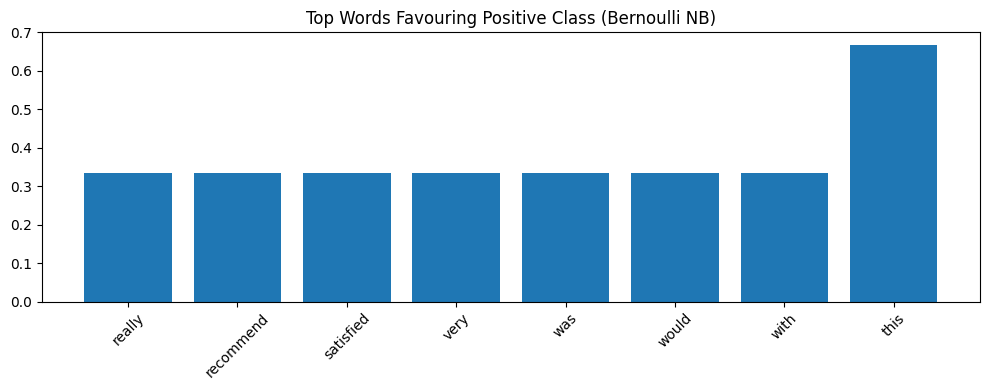

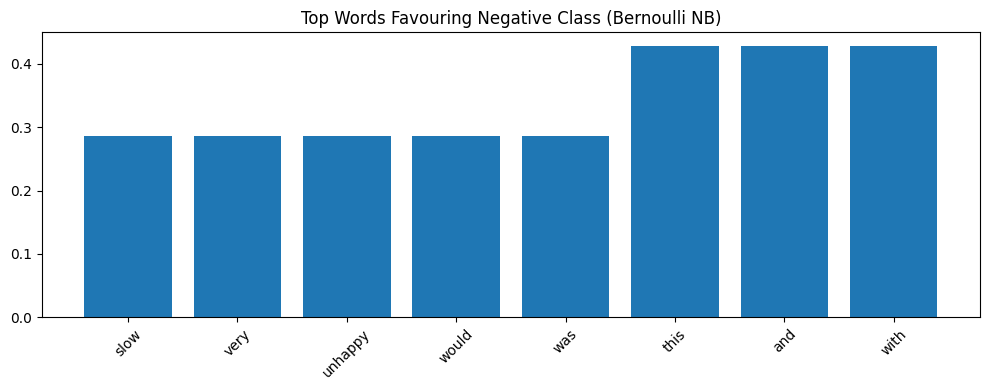

In [ ]:
plt.figure(figsize=(10, 4))
plt.bar([feature_names_b[i] for i in top_pos_idx_b], prob_pos[top_pos_idx_b])
plt.xticks(rotation=45)
plt.title("Top Words Favouring Positive Class (Bernoulli NB)")
plt.tight_layout()
plt.show()

# 8. PLOT TOP NEGATIVE WORDS
top_neg_idx_b = np.argsort(prob_neg)[-8:]

plt.figure(figsize=(10, 4))
plt.bar([feature_names_b[i] for i in top_neg_idx_b], prob_neg[top_neg_idx_b])
plt.xticks(rotation=45)
plt.title("Top Words Favouring Negative Class (Bernoulli NB)")
plt.tight_layout()
plt.show()